In [40]:
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

%config InlineBackend.figure_format = 'svg'
plt.rcParams['font.size'] = 12

#### Get thermal gens Boolean index

In [2]:
# Time steps
nt = 12

# All buses
num_buses = 118
buses = np.arange(1, num_buses+1)

# Read thermal buses
file_path = '../../data/IEEE_Case118/zones/thermal_bus.csv'
thermal_buses = pd.read_csv(file_path, header=None, index_col=None)

# Get thermal buses Boolean index
thermal_bidx = np.isin(buses, thermal_buses)

#### Plot UC ground true and prediction

In [3]:
# The number of demonstration plots
num_demos = 10

for i in range(num_demos):
    # Read UC true
    file_path = f'./model_evaluation/UC_true/true_{i+1}.csv'
    UC_true = pd.read_csv(file_path, header=None, index_col=None).to_numpy()
    UC_true = UC_true[thermal_bidx]

    # Read UC prediction
    file_path = f'./model_evaluation/UC_pred/pred_{i+1}.csv'
    UC_pred= pd.read_csv(file_path, header=None, index_col=None)
    UC_pred = UC_pred[thermal_bidx]

    fig = plt.figure(figsize=(5, 4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_title('Ground truth')
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.set_title('Prediction')
    sns.heatmap(UC_true, 
                ax=ax1, 
                cbar=False, 
                vmin=0, 
                vmax=1, 
                xticklabels=[], 
                yticklabels=[],
                linewidth=1)
    sns.heatmap(UC_pred, 
                ax=ax2, 
                cbar=False, 
                vmin=0, 
                vmax=1, 
                xticklabels=[], 
                yticklabels=[],
                linewidth=1)
    plt.tight_layout()
    fig.savefig(f'./model_evaluation/UC_plotting/fig{i+1}.pdf')
    plt.close('all')

#### Calculate accuracy

In [4]:
# Overall number of UC
num_data = 200

# Read ground truth
UC_true_list = np.zeros((num_data, num_buses, nt))
for i in range(num_data):
    # Read UC true
    file_path = f'./model_evaluation/UC_true/true_{i+1}.csv'
    UC_true = pd.read_csv(file_path, header=None, index_col=None).to_numpy()
    UC_true_list[i] = UC_true.copy()

UC_true_list = UC_true_list[:, thermal_bidx, :]

# Read prediction
UC_pred_list = np.zeros((num_data, num_buses, nt))
for i in range(num_data):
    # Read UC true
    file_path = f'./model_evaluation/UC_pred/pred_{i+1}.csv'
    UC_pred = pd.read_csv(file_path, header=None, index_col=None).to_numpy()
    UC_pred_list[i] = UC_pred.copy()

UC_pred_list = UC_pred_list[:, thermal_bidx, :]

#### Plot average accuracy

In [5]:
# Read gen buses
file_path = '../../data/IEEE_Case118/zones/gen_bus.csv'
gen_buses = pd.read_csv(file_path, header=None, index_col=None)

# Read thermal buses
file_path = '../../data/IEEE_Case118/zones/thermal_bus.csv'
thermal_buses = pd.read_csv(file_path, header=None, index_col=None)

# Get Booleanindex of thermal buses in gen buses
bidx = np.isin(gen_buses, thermal_buses)

# Get thermal gen features (To be determined)
Pmax = pd.read_csv('../../data/IEEE_Case118/gen_params/Pmax.csv',
                    header=None,
                    index_col=None)

# Get thermal Pmax
thermal_Pmax = Pmax[bidx].to_numpy().flatten().round(2)

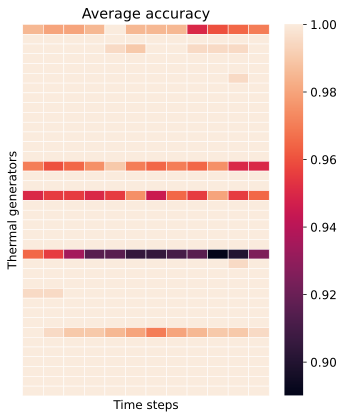

In [41]:
# Compare UC_true and UC_pred
acc = (UC_true_list == UC_pred_list).astype(int)

# Calculate accuracy
res = np.mean(acc, axis=0)

# Plot average accuracy
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
sns.heatmap(res, 
            ax=ax,
            xticklabels=[], 
            yticklabels=[],
            linewidth=0.5)
ax.set_title('Average accuracy')
ax.set_xlabel('Time steps')
ax.set_ylabel('Thermal generators')
plt.tight_layout()
plt.show()
plt.close('all')

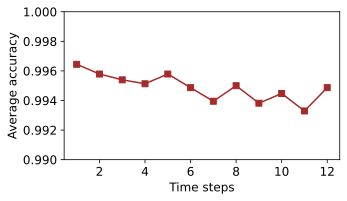

In [42]:
# Average accuracy at each time step
x = np.arange(1, 13)

acc1 = res.mean(axis=0)

fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)
ax.plot(x, acc1, marker='s', color='brown')
ax.set_ylim((0.99, 1.))
ax.set_xlabel('Time steps')
ax.set_ylabel('Average accuracy')
plt.tight_layout()
plt.show()
plt.close('all')

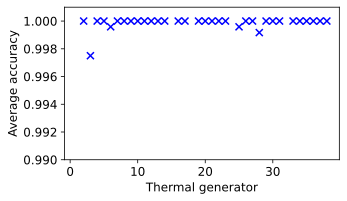

In [43]:
# Average accuracy for each thermal generator
x = np.arange(1, 39)

acc2 = res.mean(axis=1)

fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)
ax.scatter(x, acc2, marker='x', color='blue', s=50)
ax.set_ylim((0.99, 1.001))
ax.set_xlabel('Thermal generator')
ax.set_ylabel('Average accuracy')
plt.tight_layout()
plt.show()
plt.close('all')